In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
#Load the data set
train = pd.read_csv("/content/Titanic_train_merged.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(1309, 12)

In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.385791,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486968,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
#We don't need name column for analysis-drop name column-non-standard
train1=train.drop('Name',axis=1)

<Axes: >

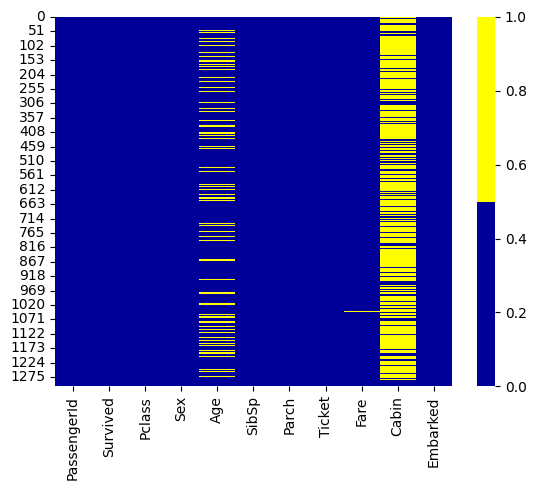

In [ ]:
import seaborn as sns
cols = train1.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train1[cols].isnull(),
            cmap=sns.color_palette(colours))

In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


In [ ]:
'''Since Cabin is containing more number of null values-only 295 non-null values are there out of 1309 rowa
so we can drop cabin column'''
train2=train1.drop('Cabin',axis=1)

In [ ]:
#We don't have any role of id with survival,so we can drop id also
train3=train2.drop('PassengerId',axis=1)

In [ ]:
train3.shape

(1309, 9)

In [ ]:
train3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [ ]:
train3[train3.duplicated()].shape

(24, 9)

In [ ]:
train4=train3.drop_duplicates()

In [ ]:
train4.shape

(1285, 9)

In [ ]:
'''Age is also having more null values but it is important for survival analysis
So,we will replace it with its mean/median'''
median=train4['Age'].median()
median

28.0

In [ ]:
train4['Age']=train4['Age'].fillna(median)

<ipython-input-37-33acc368adea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train4['Age']=train4['Age'].fillna(median)


In [ ]:
train4['Age'].isnull().sum()

0

In [ ]:
train4['Fare'].isnull().sum()

1

In [ ]:
mean=train4['Fare'].mean()
print(mean)
train4['Fare']=train4['Fare'].fillna(mean)

33.165053426791275


<ipython-input-40-bfeb2d1d94db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train4['Fare']=train4['Fare'].fillna(mean)


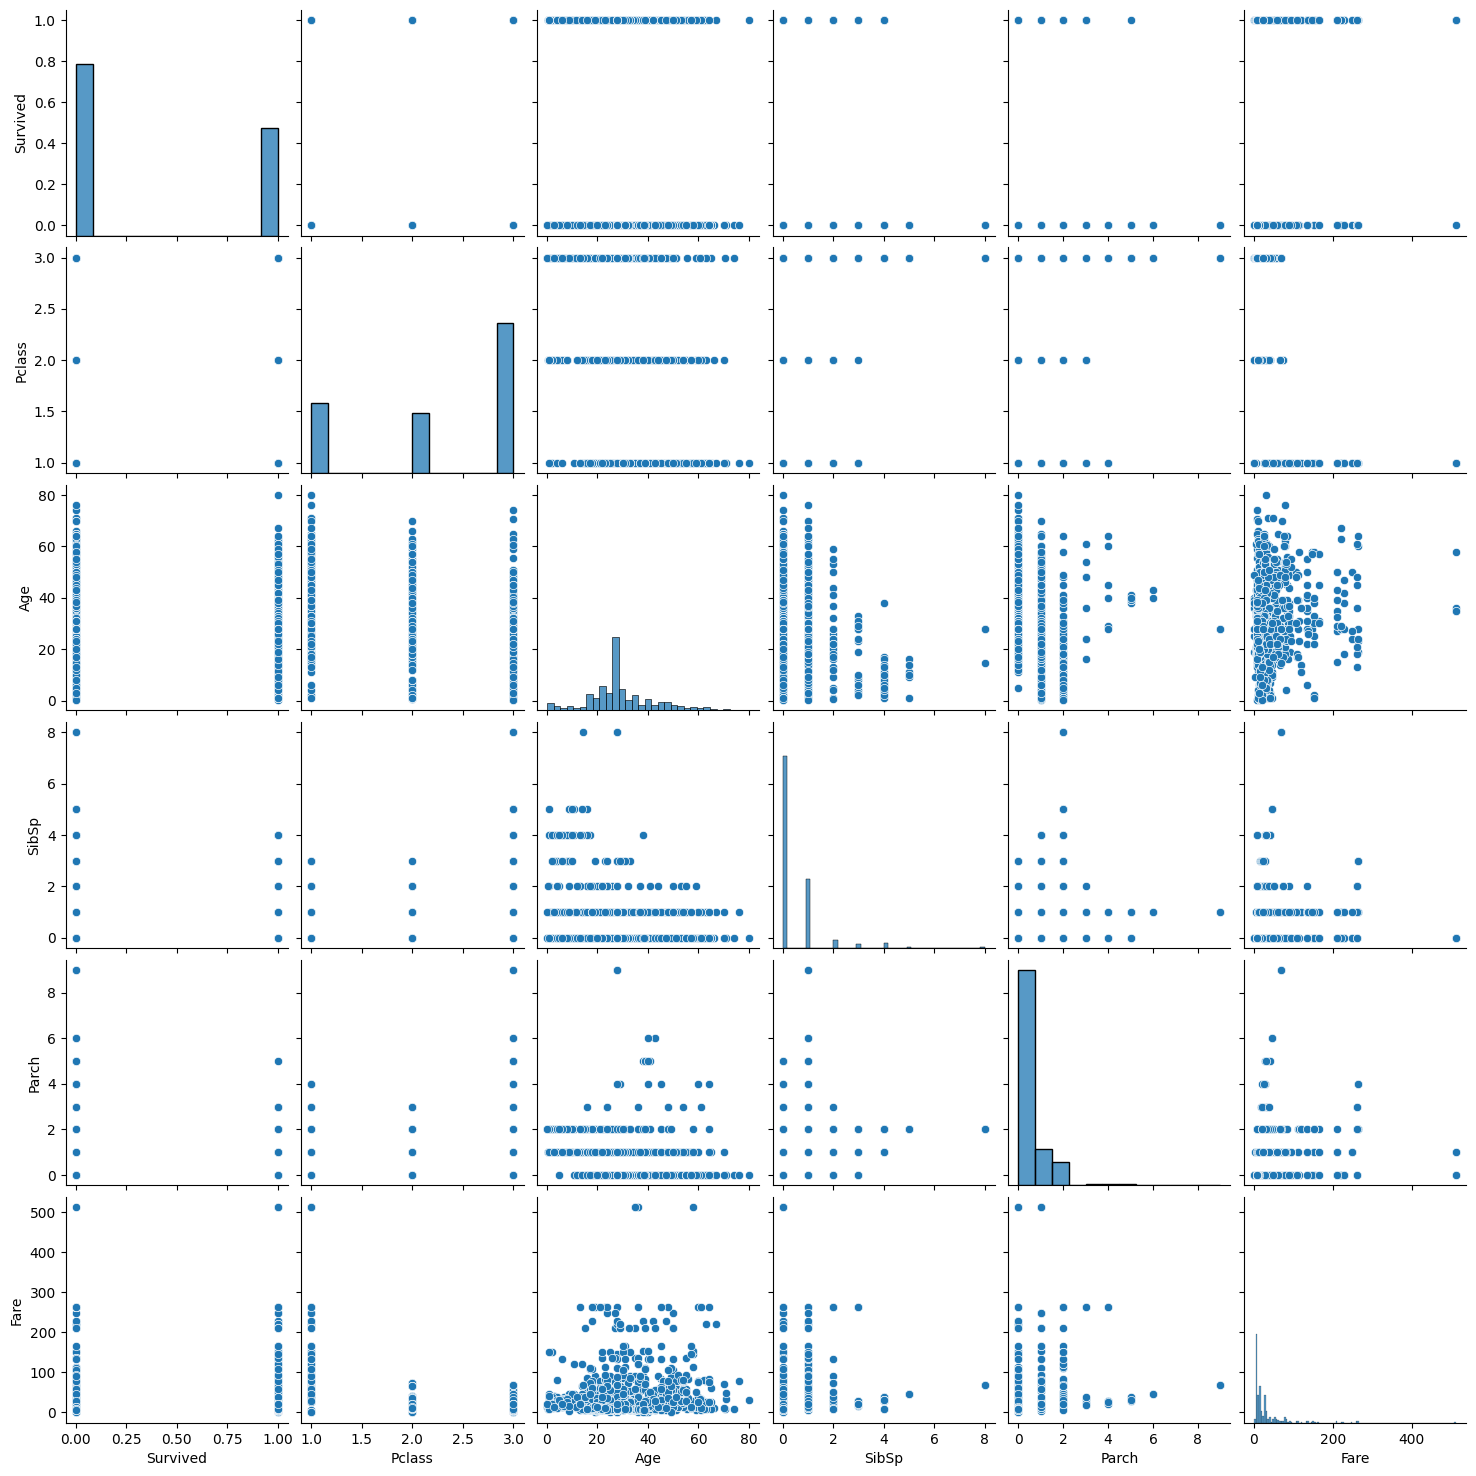

In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(train4)

In [ ]:
train5=pd.get_dummies(train4,dtype=int)

In [ ]:
# Dividing our data into input and output variables
X = train5.iloc[:,1:]
Y = train5.iloc[:,0]

In [ ]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [ ]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [ ]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,0
3,1,1
4,0,0
...,...,...
1304,0,0
1305,1,1
1306,0,0
1307,1,0


In [ ]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[678 110]
 [226 271]]


In [ ]:
((678+271)/(678+271+110+226))*100

73.85214007782102

In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       788
           1       0.71      0.55      0.62       497

    accuracy                           0.74      1285
   macro avg       0.73      0.70      0.71      1285
weighted avg       0.74      0.74      0.73      1285



Text(0, 0.5, 'True Positive Rate')

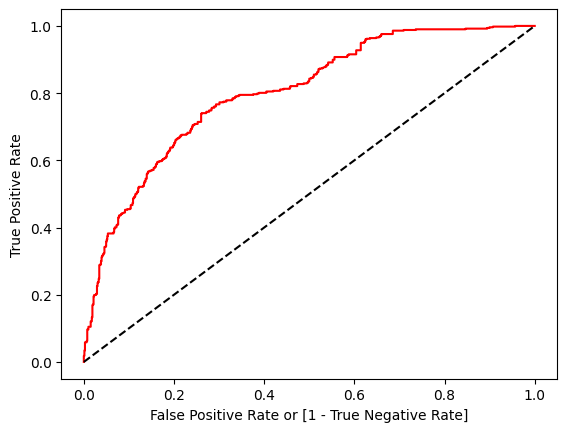

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


**Interview Questions**

1. What is the difference between precision and recall?

Ans:Precision is used to shows,when predicting the target class how often an Machine Learning model is correct.And recall measures the completeness of positive predictions.

2. What is cross-validation, and why is it important in binary classification?

Ans:Cross validation is a technique used in machine learning to evaluate the performance of a model on subsets of the available input data and evaluating them on the complementary subset of the data.
Cross Validation is used to detect over fitting.